Text(0,0.5,'Susceptibles')

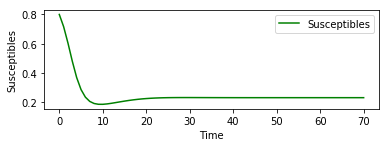

In [13]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

beta_w, beta_r = 1, 0.1
gamma = 0.14286
nou = 0.1
miu = 0.1
T = -0.01
TS=1.0
ND=70.0
S0=0.8
Iw0=0.1
Ir0=0.1
INPUT = (S0, Iw0, Ir0)


def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = nou - beta_w * V[0] * V[1] - beta_r * V[0] * V[2] - miu * V[0]
	Y[1] = beta_w * V[0] * V[1] - (gamma + T) * V[1] - miu * V[1]
	Y[2] = beta_r * V[0] * V[2] - gamma * V[2] - miu * V[2]
	return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)



#Ploting
pl.subplot(211)
pl.plot(RES[:,0], '-g', label='Susceptibles')
#pl.plot(RES[:,2], '-k', label='Recovereds')
pl.legend(loc=0)
#pl.title('')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
#pl.subplot(212)
#pl.plot(RES[:,1], '-r', label='Infectious')
#pl.xlabel('Time')
#pl.ylabel('Infectious')
#pl.show()